Gaming is very common nowadays amon youngsters. This part aims to detect the emotional state of the people during gaming. We make use of the popular gaming stimulation dataset AGAIN affect gaming annotation dataset- data. This data contains realtime annotation of gamers and their arousal levels.




First we begin by loading the data and separating it into categorical and continuous features. Categorical feature are those which have classes or which are quantised whereas continuous features are not quantised as the name suggests. We convert the categorical features to integers using the labelencoder from sklearn. Finally, we use the popular TabNet model to perform regression. TabNet is one of the most widely used and a highly accurate model for both tabular classification and regression. In the end we also plot out the explanation masks from the trained model.


In [1]:
!gdown --id 1WOI30_JwR-DjB04-5YA4jte38d3ugmB2

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1WOI30_JwR-DjB04-5YA4jte38d3ugmB2
From (redirected): https://drive.google.com/uc?id=1WOI30_JwR-DjB04-5YA4jte38d3ugmB2&confirm=t&uuid=c8a5c092-7dea-4442-b078-1b7db92eba05
To: /content/clean_data.csv
100% 263M/263M [00:07<00:00, 35.2MB/s]


In [2]:
import pandas as pd
df = pd.read_csv('clean_data.csv')
df.head()

<ipython-input-2-f81d74a3c002>:2: DtypeWarning: Columns (23,24,98,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data.csv')


,[control]genre,[control]player_id,[control]session_id,[control]game,[control]time_index,[control]epoch,[control]time_stamp,[control]engine_tick,[output]arousal,[general]time_passed,...,player_slow_pickup,player_has_powerup,bot_has_collisions,bot_is_colliding_above,bot_is_colliding_below,bot_is_colliding_left,bot_is_colliding_right,bot_is_falling,bot_is_jumping,bot_charging
0,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00,1.589291e+12,0.0000,39,0.214286,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00.250000,1.589291e+12,0.2524,39,0.214286,0.002056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00.500000,1.589291e+12,0.5052,39,0.214286,0.004115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00.750000,1.589291e+12,0.7572,39,0.214286,0.006167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:01,1.589291e+12,1.0123,39,0.214286,0.008245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [4]:
df['[output]arousal'].unique()

array([0.21428571, 0.14285714, 0.07142857, ..., 0.94702602, 0.96561338,
       0.98420074])

In [5]:
!pip install pytorch-tabnet -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.7 MB/s eta 0:00:00


In [6]:
from pytorch_tabnet.tab_model import TabNetRegressor

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np


In [7]:
categorical_columns = []
categorical_dims =  {}
for col in df.columns[df.dtypes == object]:
    print(col, df[col].nunique())
    l_enc = LabelEncoder()
    df[col] = df[col].fillna("NA")
    df[col] = l_enc.fit_transform(df[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)
for col in df.columns[df.dtypes == 'int64']:
    df.fillna(df.loc[:, col].mean(), inplace=True)

for col in df.columns[df.dtypes == 'float64']:
    df.fillna(df.loc[:, col].mean(), inplace=True)

[control]genre 3
[control]player_id 122
[control]session_id 995
[control]game 9
[control]time_index 522
[string]key_presses 53609
[string]player_aim_target 70
[string]bot_damaged_by 9
[string]player_damaged_by 25
[string]bot_types 64
[string]pick_up_types 27


In [8]:
target = '[output]arousal'

features = [ col for col in df.columns if col not in [target]]

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
cat_dims

[3, 122, 995, 9, 522, 53610, 71, 10, 26, 65, 28]

In [11]:
cat_emb_dim = [2, 64, 128, 6, 128, 1024, 16, 3,8,11,15]

In [12]:
clf = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs)

In [13]:
X_train = df[features].values
y_train = df[target].values.reshape(-1, 1)

In [14]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_metric=['rmsle', 'mae', 'rmse', 'mse'],
    max_epochs=25,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.08505 |  0:00:35s
epoch 1  | loss: 0.06666 |  0:01:09s
epoch 2  | loss: 0.05809 |  0:01:42s
epoch 3  | loss: 0.05146 |  0:02:14s
epoch 4  | loss: 0.04786 |  0:02:46s
epoch 5  | loss: 0.03943 |  0:03:19s
epoch 6  | loss: 0.03267 |  0:03:52s
epoch 7  | loss: 0.02801 |  0:04:25s
epoch 8  | loss: 0.02465 |  0:04:58s
epoch 9  | loss: 0.02279 |  0:05:31s
epoch 10 | loss: 0.02108 |  0:06:04s
epoch 11 | loss: 0.01964 |  0:06:37s
epoch 12 | loss: 0.01824 |  0:07:11s
epoch 13 | loss: 0.0176  |  0:07:44s
epoch 14 | loss: 0.01622 |  0:08:17s
epoch 15 | loss: 0.01544 |  0:08:50s
epoch 16 | loss: 0.01455 |  0:09:23s
epoch 17 | loss: 0.0136  |  0:09:56s
epoch 18 | loss: 0.01245 |  0:10:29s
epoch 19 | loss: 0.0135  |  0:11:01s
epoch 20 | loss: 0.01148 |  0:11:34s
epoch 21 | loss: 0.01169 |  0:12:06s
epoch 22 | loss: 0.01087 |  0:12:39s
epoch 23 | loss: 0.01915 |  0:13:11s
epoch 24 | loss: 0.01542 |  0:13:44s


In [15]:
preds = clf.predict(X_train)
y_true = y_train
test_score = mean_squared_error(y_pred=preds, y_true=y_true)

In [16]:
print('Predictions: ', preds)

Predictions:  [[0.09620941]
 [0.0967306 ]
 [0.09725527]
 ...
 [0.19045374]
 [0.16921753]
 [0.22494619]]


In [17]:
print(X_train[0])

[0.00000000e+00 0.00000000e+00 9.36000000e+02 1.00000000e+00
 0.00000000e+00 1.58929112e+12 0.00000000e+00 3.90000000e+01
 0.00000000e+00 3.27868852e-01 3.33333333e-01 5.12821000e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51748266e-01
 2.50000000e-01 3.69060000e+04 2.80000000e+01 2.00000000e+00
 3.27868852e-01 4.87179000e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00047416e+00 0.00000000e+00
 1.00047416e+00 1.00000000e+00 1.00047416e+00 0.00000000e+00
 1.00000000e+00 1.00047416e+00 0.00000000e+00 0.00000000e+00
 1.00047416e+00 1.00047416e+00 1.00047416e+00 1.00047416e+00
 1.00047416e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00047416e+00 0.00000000e+00 1.00047416e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00047416e+00
 0.00000000e+00 0.00000000e+00 1.00047416e+00 0.00000000e+00
 0.00000000e+00 1.00047416e+00 1.00047416e+00 0.00000000e+00
 1.00047416e+00 1.000474

In [18]:
print(preds[0])

[0.09620941]


In [19]:
clf.feature_importances_

array([0.00000000e+00, 3.04192170e-01, 0.00000000e+00, 0.00000000e+00,
       1.79971002e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.28758183e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.33376089e-03, 0.00000000e+00, 1.44415936e-02, 0.00000000e+00,
       1.84266284e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.05693829e-06, 0.00000000e+00, 0.00000000e+00, 6.25851518e-04,
       0.00000000e+00, 0.00000000e+00, 7.53699703e-02, 0.00000000e+00,
       0.00000000e+00, 7.66180089e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.11122853e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.97613584e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

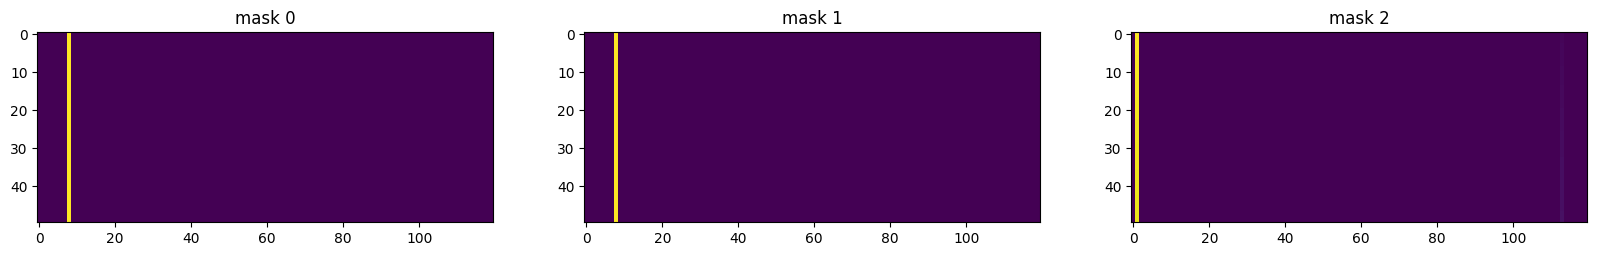

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
explain_matrix, masks = clf.explain(X_train)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

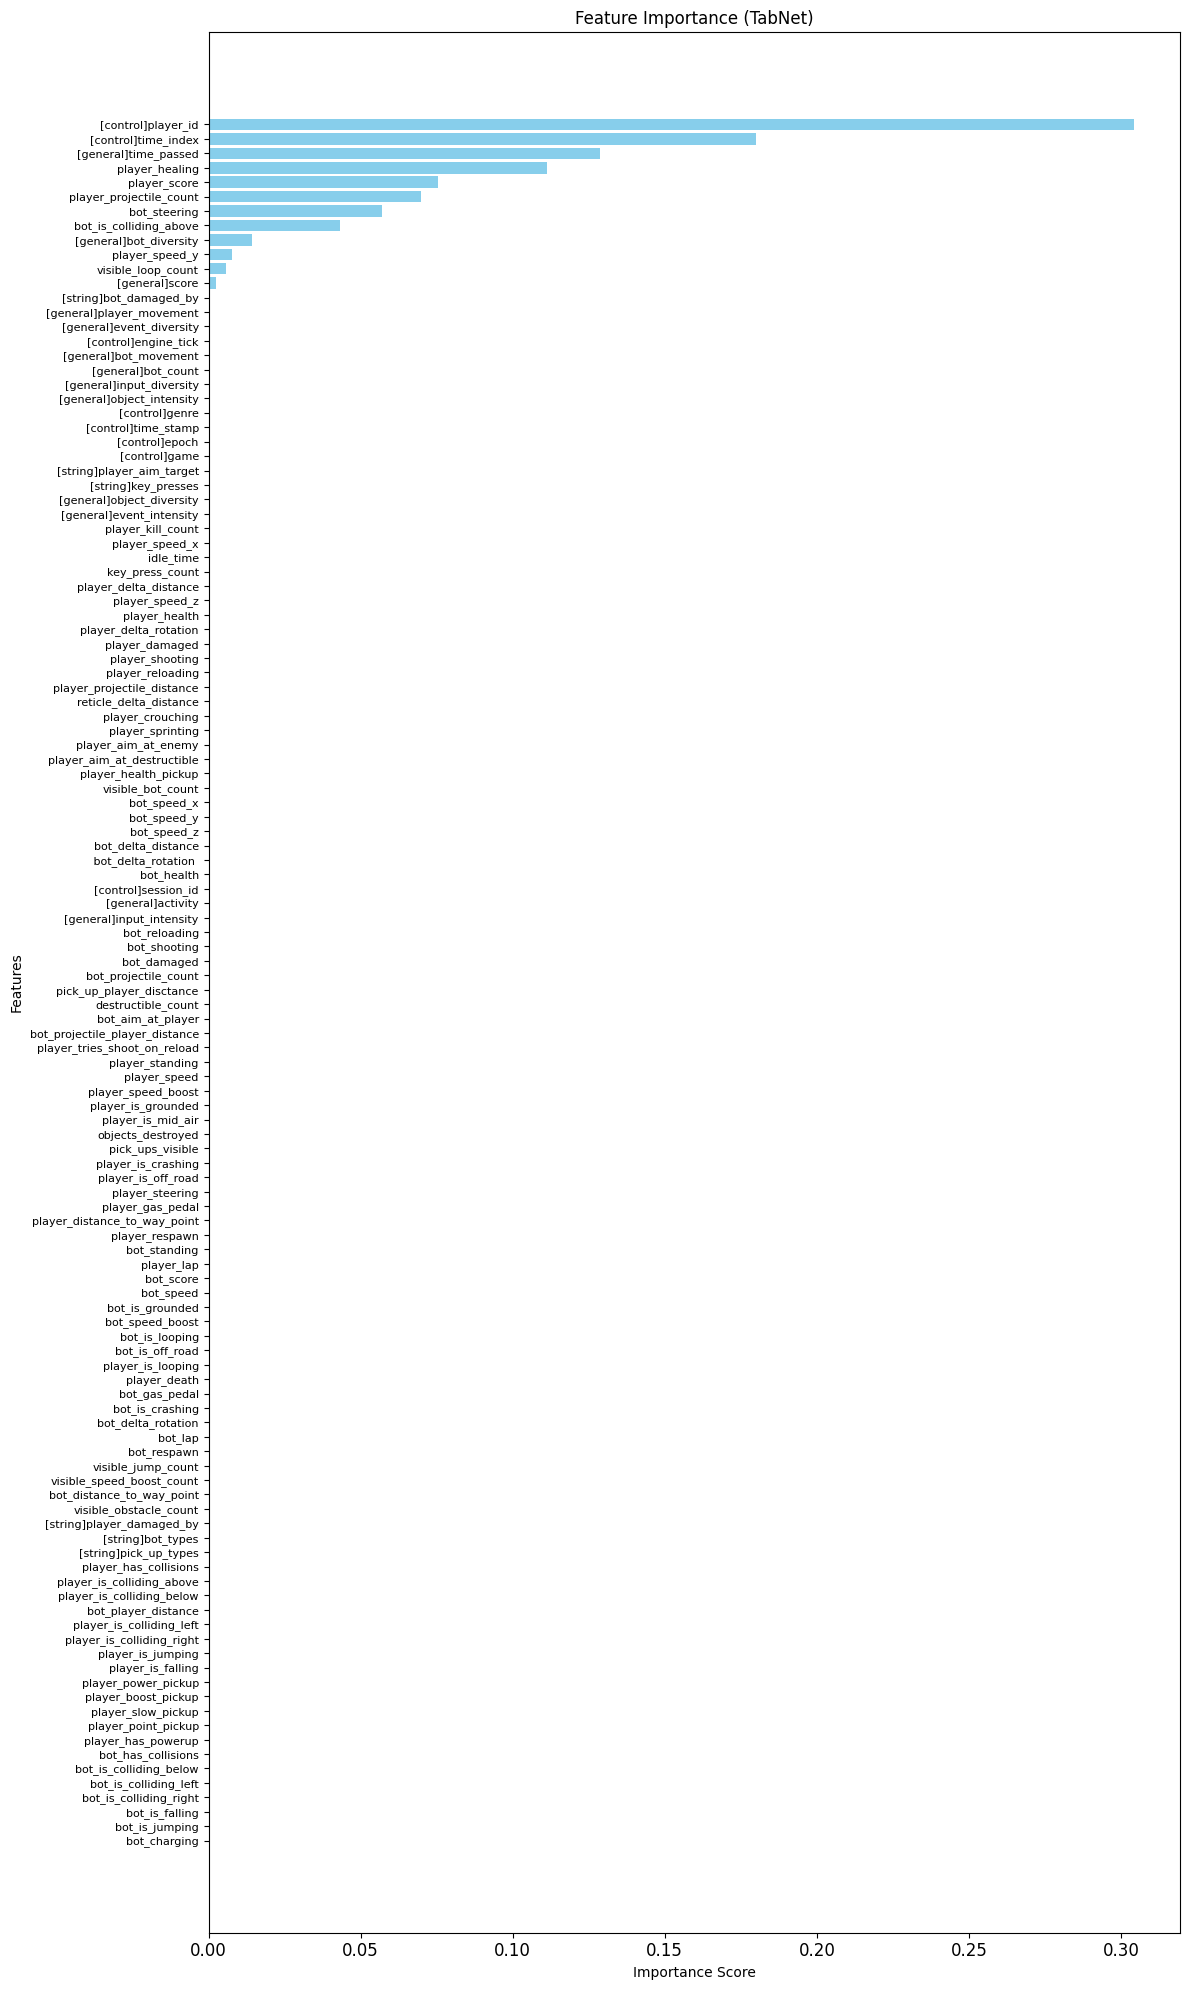

In [24]:
# Get feature importances from the trained TabNet model
importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame({
    'Feature': features,  # from your earlier: features = [ col for col in df.columns if col not in [target]]
    'Importance': importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Optional: Truncate long feature names
importance_df['Feature'] = importance_df['Feature'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)

# Plotting
plt.figure(figsize=(12, 20))  # Adjust as needed
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (TabNet)')
plt.gca().invert_yaxis()  # Highest importance at top
plt.xticks(fontsize=12)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


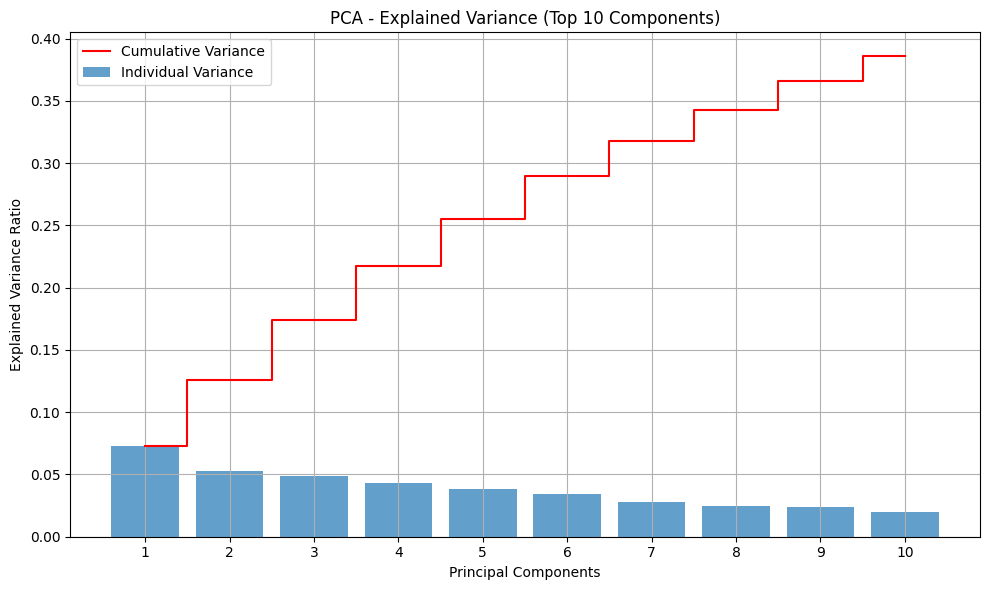

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load dataset

features = [col for col in df.columns if col != target]

X = df[features].copy()

# 1. Encode categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].fillna("NA")
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# 2. Impute missing values (for numerical columns)
X = X.fillna(X.mean(numeric_only=True))

# 3. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# 5. Create DataFrame of results
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
pca_df[target] = df[target].values  # Add back target for visualization

# 6. Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.7, label='Individual Variance')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid', color='red', label='Cumulative Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance (Top 10 Components)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
